### Dataset descriptions


In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

!pip install imbalanced-learn==0.10.1
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Load the Data


In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data


No outliers detected in column 'Age'.
No outliers detected in column 'Income'.
No outliers detected in column 'LoanAmount'.
No outliers detected in column 'CreditScore'.
No outliers detected in column 'MonthsEmployed'.
No outliers detected in column 'NumCreditLines'.
No outliers detected in column 'InterestRate'.
No outliers detected in column 'LoanTerm'.
No outliers detected in column 'DTIRatio'.
Outliers detected in column 'Default':
            LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
5       A9S62RQ7US   25   90298       90448          720              18   
8       1R0N3LGNRJ   36   42053       92357          827              83   
11      Y8UETC3LSG   28  149227      139759          375              56   
18      O1IKKLC69B   19   40718       78515          319             119   
...            ...  ...     ...         ...          ...             ...   
255310  F40NYFL3QR   65  111

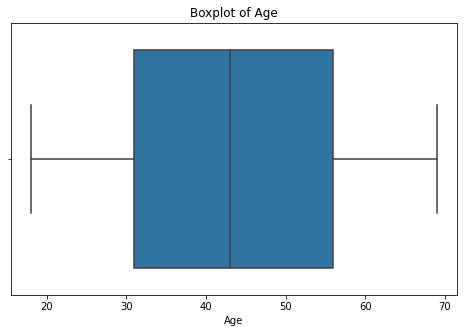

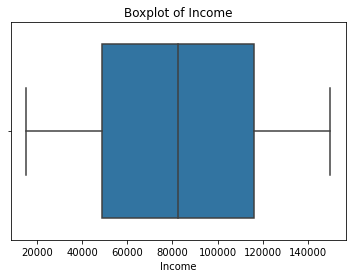

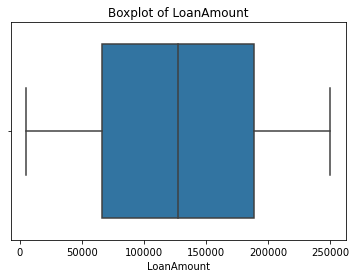

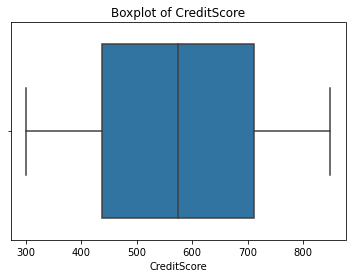

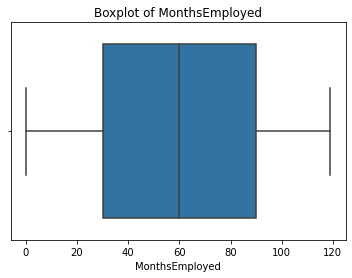

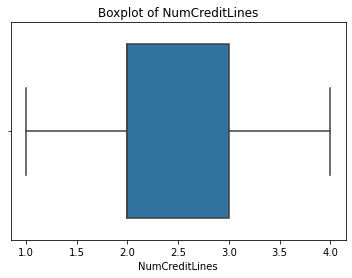

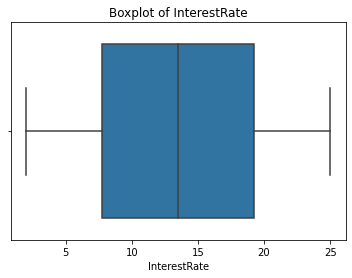

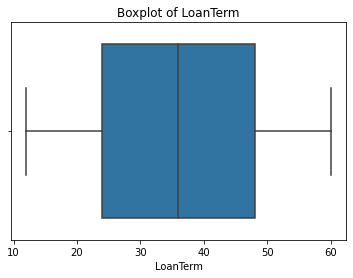

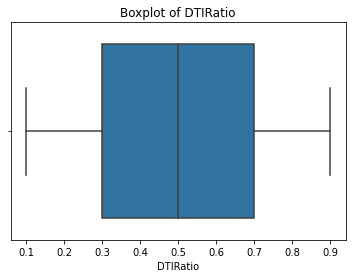

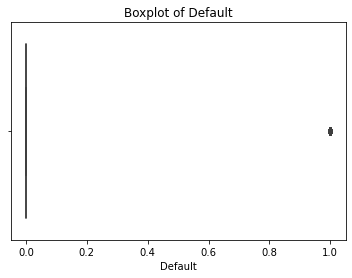

In [5]:
train_df.isnull().sum() #No missing values

#Outliers

def outliers_iqr(train_df,column):
    Q1= train_df[column].quantile(0.25)
    Q3= train_df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]
    return outliers

    
for col in train_df.select_dtypes(include=["float64", "int64"]):
    outliers = outliers_iqr(train_df, col)

    if not outliers.empty:
        print(f"Outliers detected in column '{col}':")
        print(outliers)
    else:
        print(f"No outliers detected in column '{col}'.")
        
plt.figure(figsize=(8, 5))
for col in train_df.select_dtypes(include=['float64', 'int64']):
    sns.boxplot(data=train_df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()
        


# AdaBoost

In [11]:
X_train = train_df.drop(columns=['LoanID', 'Default'])
y_train = train_df['Default']                          
X_test = test_df.drop(columns=['LoanID'])   
test_ids = test_df['LoanID']                           

# One-hot encode categorical variables
categorical_columns = X_train.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
base_estimator = DecisionTreeClassifier(max_depth=1)  

# AdaBoost
ada_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),  
    n_estimators=200,               
    learning_rate=0.1,              
    random_state=42                 
)

ada_model.fit(X_train, y_train)


predicted_probabilities = ada_model.predict_proba(X_test)[:, 1]
predicted_classes = ada_model.predict(X_test)

prediction_df = pd.DataFrame({
    'LoanID': test_ids,
    'predicted_probability': predicted_probabilities
})

prediction_df.to_csv('adaboost_predictions.csv', index=False)
print(prediction_df.head())


0    225694
1     29653
Name: Default, dtype: int64
       LoanID  predicted_probability
0  7RYZGMKJIR               0.469776
1  JDL5RH07AM               0.454044
2  STAL716Y79               0.459398
3  SO0KKJ3IQB               0.480666
4  T99CWTYDCP               0.473438


In [12]:
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [13]:
assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [14]:
assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [10]:
assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'